In [1]:
# 주제 : 도시별 총 생산량(GRDP), 경제활동 인구 비율, 고령 인구 비율이 경제 성장률과의 상관관계가 있는가?

# 1. 도시별 GRDP, 경제활동 인구 수, 고령 인구 비율, 경제 성장률의 데이터 프레임을 가져온다.
# 2. 4가지의 데이터 프레임을 가공한다.
# 3. 고령 인구 비율 데이터프레임에 있는 도시별 인구 수를 추출한다.
# 4. 도시별 경제활동 인구 수와 도시별 인구 수를 나누어 도시별 경제활동 인구 비율 데이터 프레임을 만든다.
# 5. 4가지의 데이터 프레임을 정규화한다.
# 6. 4가지의 데이터 프레임을 더블인덱스로 묶어 하나의 데이터 프레임을 만든다.
# 7. 4가지의 값을 산점도 그래프를 사용하여 도출한다.
# 8. 도시별로 비교할 수 있는 그래프를 만든다.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [3]:
df1 = pd.read_excel('GRDP_시도.xlsx')  # GRDP  
df2 = pd.read_excel('경제성장률_시도__20230222224924.xlsx')   # 경제성장률  
df4 = pd.read_excel('경제활동인구_시도__20230222225929.xlsx')  # 경제활동인구
df3 = pd.read_excel('고령인구비율_시도_시_군_구__20230222225425.xlsx') # 고령인구비율

In [4]:
# df1.to_excel('GRDP_시도.xlsx', index=False)
# df2.to_excel('경제성장률_시도__20230222224924.xlsx', index=False)
# df3.to_excel('경제활동인구_시도__20230222225929.xlsx', index=False)
# df4.to_excel('고령인구비율_시도_시_군_구__20230222225425.xlsx', index=False)

In [5]:
df1  # 총 생산량 데이터 프레임

,경제활동별(1),시도별(1),1985,1985.1,1986,1986.1,1987,1987.1,1988,1988.1,...,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1
0,경제활동별(1),시도별(1),명목,실질,명목,실질,명목,실질,명목,실질,...,명목,실질,명목,실질,명목,실질,명목,실질,명목,실질
1,지역내총생산(시장가격),전국,91625288,278804522,107026220,308977877,124635951,346934339,149134859,388842170,...,1840348850,1762932983,1902527946,1814075680,1927421209,1854370144,1944644393,1842426414,2076254437,1919305433
2,NaN,서울특별시,23118019,77310769,27275885,85661549,32075111,97480930,37559452,107819304,...,404079600,389584629,423742112,403605888,435927212,414092568,444544909,417638547,471730788,432406018
3,NaN,부산광역시,7009992,21773910,7983184,23751051,9294215,26214172,10674301,28703583,...,87835601,85441974,89979896,86889875,93012134,89105372,91286486,85962709,98651991,87906722
4,NaN,대구광역시,3940271,13889560,4684045,15391591,5589706,17380068,6345089,18711134,...,54832958,52721214,56714479,53964991,58094694,54762237,57725389,53668577,60865535,56026338
5,NaN,인천광역시,4227110,13731212,4921002,15072642,5737030,17114977,7062631,19699166,...,88547364,85791563,88735401,86426825,90040500,87963593,89615465,84907539,97894444,89984023
6,NaN,광주광역시,-,-,-,-,2330249,7421376,3068929,8961220,...,37743917,36384616,39805406,38216077,41519553,39624032,42068384,39530642,43454904,41118247
7,NaN,대전광역시,-,-,-,-,-,-,-,-,...,40537224,38772485,41308348,39135729,43092218,40684092,44393136,41208249,46379776,42368245
8,NaN,울산광역시,-,-,-,-,-,-,-,-,...,75750070,72968962,73647537,71344390,74654628,72024599,69363394,67136435,77683017,69621279
9,NaN,세종특별자치시,-,-,-,-,-,-,-,-,...,10632043,10140164,11101861,10423610,11855276,11091040,12703589,11647981,13898917,12489323


In [6]:
df1 = df1.loc[2:,[col for col in df1.columns if col >= '2000' and len(col)==6]]     
# 실질값이 들어있는 데이터를 뽑아내기 위해 길이가 6인 값들을 추출
df1           

,시도별(1),2000.1,2001.1,2002.1,2003.1,2004.1,2005.1,2006.1,2007.1,2008.1,...,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1
2,서울특별시,234450139,244418894,261328220,266033918,269197325,280676032,292392945,309525926,317128072,...,348568408,354319250,359661759,370167867,380679274,389584629,403605888,414092568,417638547,432406018
3,부산광역시,51705541,55382619,57866997,59924431,61227100,63032743,65299325,68944140,70785024,...,75742868,77000292,80258570,82701497,84114530,85441974,86889875,89105372,85962709,87906722
4,대구광역시,33378959,34134803,35743105,36396595,38364894,39039831,40255437,42074727,42614503,...,47367831,49036361,50329551,51822013,51823902,52721214,53964991,54762237,53668577,56026338
5,인천광역시,43019365,46255108,50972798,52157498,54987798,56922112,59522631,64675503,64033773,...,73129842,75073082,78694187,80137506,82257112,85791563,86426825,87963593,84907539,89984023
6,광주광역시,19742330,20828849,22420270,22585186,23198230,24953345,26193910,27392264,27791206,...,31650181,32859385,34169569,34845589,35933462,36384616,38216077,39624032,39530642,41118247
7,대전광역시,23066261,23813574,25497366,26757005,27540951,28061744,29074607,29906786,30273625,...,34977219,35375467,36081650,37162614,38456557,38772485,39135729,40684092,41208249,42368245
8,울산광역시,49333661,50423452,55068266,54100049,59706880,61626834,62869561,65950587,64401338,...,71957705,72322408,72408971,72854409,73477668,72968962,71344390,72024599,67136435,69621279
9,세종특별자치시,-,-,-,-,-,-,-,-,-,...,-,6883305,8635120,9261543,9729904,10140164,10423610,11091040,11647981,12489323
10,경기도,157417148,171443115,186126487,196745165,208742156,222816035,242756988,255550481,268221081,...,327820620,346430719,362159526,381978306,399827962,426172886,451914662,462288338,470022670,496672331
11,강원도,26145825,26668912,27377155,28861908,29386767,29695748,31550828,32853097,33674653,...,37021010,38211948,40077987,40867985,42047331,43761362,44574334,46064137,44829136,46476220


In [7]:
df1=df1.rename(columns={'시도별(1)':'도시'})
df1

,도시,2000.1,2001.1,2002.1,2003.1,2004.1,2005.1,2006.1,2007.1,2008.1,...,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1
2,서울특별시,234450139,244418894,261328220,266033918,269197325,280676032,292392945,309525926,317128072,...,348568408,354319250,359661759,370167867,380679274,389584629,403605888,414092568,417638547,432406018
3,부산광역시,51705541,55382619,57866997,59924431,61227100,63032743,65299325,68944140,70785024,...,75742868,77000292,80258570,82701497,84114530,85441974,86889875,89105372,85962709,87906722
4,대구광역시,33378959,34134803,35743105,36396595,38364894,39039831,40255437,42074727,42614503,...,47367831,49036361,50329551,51822013,51823902,52721214,53964991,54762237,53668577,56026338
5,인천광역시,43019365,46255108,50972798,52157498,54987798,56922112,59522631,64675503,64033773,...,73129842,75073082,78694187,80137506,82257112,85791563,86426825,87963593,84907539,89984023
6,광주광역시,19742330,20828849,22420270,22585186,23198230,24953345,26193910,27392264,27791206,...,31650181,32859385,34169569,34845589,35933462,36384616,38216077,39624032,39530642,41118247
7,대전광역시,23066261,23813574,25497366,26757005,27540951,28061744,29074607,29906786,30273625,...,34977219,35375467,36081650,37162614,38456557,38772485,39135729,40684092,41208249,42368245
8,울산광역시,49333661,50423452,55068266,54100049,59706880,61626834,62869561,65950587,64401338,...,71957705,72322408,72408971,72854409,73477668,72968962,71344390,72024599,67136435,69621279
9,세종특별자치시,-,-,-,-,-,-,-,-,-,...,-,6883305,8635120,9261543,9729904,10140164,10423610,11091040,11647981,12489323
10,경기도,157417148,171443115,186126487,196745165,208742156,222816035,242756988,255550481,268221081,...,327820620,346430719,362159526,381978306,399827962,426172886,451914662,462288338,470022670,496672331
11,강원도,26145825,26668912,27377155,28861908,29386767,29695748,31550828,32853097,33674653,...,37021010,38211948,40077987,40867985,42047331,43761362,44574334,46064137,44829136,46476220


In [8]:
df1.set_index('도시',inplace=True)       
df1

,2000.1,2001.1,2002.1,2003.1,2004.1,2005.1,2006.1,2007.1,2008.1,2009.1,...,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1
도시,,,,,,,,,,,,,,,,,,,,,
서울특별시,234450139,244418894,261328220,266033918,269197325,280676032,292392945,309525926,317128072,321873162,...,348568408,354319250,359661759,370167867,380679274,389584629,403605888,414092568,417638547,432406018
부산광역시,51705541,55382619,57866997,59924431,61227100,63032743,65299325,68944140,70785024,68336815,...,75742868,77000292,80258570,82701497,84114530,85441974,86889875,89105372,85962709,87906722
대구광역시,33378959,34134803,35743105,36396595,38364894,39039831,40255437,42074727,42614503,41429265,...,47367831,49036361,50329551,51822013,51823902,52721214,53964991,54762237,53668577,56026338
인천광역시,43019365,46255108,50972798,52157498,54987798,56922112,59522631,64675503,64033773,63153061,...,73129842,75073082,78694187,80137506,82257112,85791563,86426825,87963593,84907539,89984023
광주광역시,19742330,20828849,22420270,22585186,23198230,24953345,26193910,27392264,27791206,27180608,...,31650181,32859385,34169569,34845589,35933462,36384616,38216077,39624032,39530642,41118247
대전광역시,23066261,23813574,25497366,26757005,27540951,28061744,29074607,29906786,30273625,31068315,...,34977219,35375467,36081650,37162614,38456557,38772485,39135729,40684092,41208249,42368245
울산광역시,49333661,50423452,55068266,54100049,59706880,61626834,62869561,65950587,64401338,63392764,...,71957705,72322408,72408971,72854409,73477668,72968962,71344390,72024599,67136435,69621279
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,6883305,8635120,9261543,9729904,10140164,10423610,11091040,11647981,12489323
경기도,157417148,171443115,186126487,196745165,208742156,222816035,242756988,255550481,268221081,273835863,...,327820620,346430719,362159526,381978306,399827962,426172886,451914662,462288338,470022670,496672331


In [9]:
df1.columns =[col[:4] for col in df1.columns]    #  df1의 columns에서 연도 뒤의 소수 값을 지우기 위해 [:4]를 사용하여 앞의 4글자만 가져온다 
df1

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
도시,,,,,,,,,,,,,,,,,,,,,
서울특별시,234450139,244418894,261328220,266033918,269197325,280676032,292392945,309525926,317128072,321873162,...,348568408,354319250,359661759,370167867,380679274,389584629,403605888,414092568,417638547,432406018
부산광역시,51705541,55382619,57866997,59924431,61227100,63032743,65299325,68944140,70785024,68336815,...,75742868,77000292,80258570,82701497,84114530,85441974,86889875,89105372,85962709,87906722
대구광역시,33378959,34134803,35743105,36396595,38364894,39039831,40255437,42074727,42614503,41429265,...,47367831,49036361,50329551,51822013,51823902,52721214,53964991,54762237,53668577,56026338
인천광역시,43019365,46255108,50972798,52157498,54987798,56922112,59522631,64675503,64033773,63153061,...,73129842,75073082,78694187,80137506,82257112,85791563,86426825,87963593,84907539,89984023
광주광역시,19742330,20828849,22420270,22585186,23198230,24953345,26193910,27392264,27791206,27180608,...,31650181,32859385,34169569,34845589,35933462,36384616,38216077,39624032,39530642,41118247
대전광역시,23066261,23813574,25497366,26757005,27540951,28061744,29074607,29906786,30273625,31068315,...,34977219,35375467,36081650,37162614,38456557,38772485,39135729,40684092,41208249,42368245
울산광역시,49333661,50423452,55068266,54100049,59706880,61626834,62869561,65950587,64401338,63392764,...,71957705,72322408,72408971,72854409,73477668,72968962,71344390,72024599,67136435,69621279
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,6883305,8635120,9261543,9729904,10140164,10423610,11091040,11647981,12489323
경기도,157417148,171443115,186126487,196745165,208742156,222816035,242756988,255550481,268221081,273835863,...,327820620,346430719,362159526,381978306,399827962,426172886,451914662,462288338,470022670,496672331


In [10]:
sido_df1=df1.loc['서울특별시':'세종특별자치시',:]           # 데이터프레임에서 도시별 index만 추출
sido_df1

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
도시,,,,,,,,,,,,,,,,,,,,,
서울특별시,234450139,244418894,261328220,266033918,269197325,280676032,292392945,309525926,317128072,321873162,...,348568408,354319250,359661759,370167867,380679274,389584629,403605888,414092568,417638547,432406018
부산광역시,51705541,55382619,57866997,59924431,61227100,63032743,65299325,68944140,70785024,68336815,...,75742868,77000292,80258570,82701497,84114530,85441974,86889875,89105372,85962709,87906722
대구광역시,33378959,34134803,35743105,36396595,38364894,39039831,40255437,42074727,42614503,41429265,...,47367831,49036361,50329551,51822013,51823902,52721214,53964991,54762237,53668577,56026338
인천광역시,43019365,46255108,50972798,52157498,54987798,56922112,59522631,64675503,64033773,63153061,...,73129842,75073082,78694187,80137506,82257112,85791563,86426825,87963593,84907539,89984023
광주광역시,19742330,20828849,22420270,22585186,23198230,24953345,26193910,27392264,27791206,27180608,...,31650181,32859385,34169569,34845589,35933462,36384616,38216077,39624032,39530642,41118247
대전광역시,23066261,23813574,25497366,26757005,27540951,28061744,29074607,29906786,30273625,31068315,...,34977219,35375467,36081650,37162614,38456557,38772485,39135729,40684092,41208249,42368245
울산광역시,49333661,50423452,55068266,54100049,59706880,61626834,62869561,65950587,64401338,63392764,...,71957705,72322408,72408971,72854409,73477668,72968962,71344390,72024599,67136435,69621279
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,6883305,8635120,9261543,9729904,10140164,10423610,11091040,11647981,12489323


In [11]:
sido_df1=sido_df1.replace('-',np.nan)         # 데이타프레임에서 의미없는 값인 '-' 을 NAN으로 치환
sido_df1

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
도시,,,,,,,,,,,,,,,,,,,,,
서울특별시,234450139.0,244418894.0,261328220.0,266033918.0,269197325.0,280676032.0,292392945.0,309525926.0,317128072.0,321873162.0,...,348568408.0,354319250,359661759,370167867,380679274,389584629,403605888,414092568,417638547,432406018
부산광역시,51705541.0,55382619.0,57866997.0,59924431.0,61227100.0,63032743.0,65299325.0,68944140.0,70785024.0,68336815.0,...,75742868.0,77000292,80258570,82701497,84114530,85441974,86889875,89105372,85962709,87906722
대구광역시,33378959.0,34134803.0,35743105.0,36396595.0,38364894.0,39039831.0,40255437.0,42074727.0,42614503.0,41429265.0,...,47367831.0,49036361,50329551,51822013,51823902,52721214,53964991,54762237,53668577,56026338
인천광역시,43019365.0,46255108.0,50972798.0,52157498.0,54987798.0,56922112.0,59522631.0,64675503.0,64033773.0,63153061.0,...,73129842.0,75073082,78694187,80137506,82257112,85791563,86426825,87963593,84907539,89984023
광주광역시,19742330.0,20828849.0,22420270.0,22585186.0,23198230.0,24953345.0,26193910.0,27392264.0,27791206.0,27180608.0,...,31650181.0,32859385,34169569,34845589,35933462,36384616,38216077,39624032,39530642,41118247
대전광역시,23066261.0,23813574.0,25497366.0,26757005.0,27540951.0,28061744.0,29074607.0,29906786.0,30273625.0,31068315.0,...,34977219.0,35375467,36081650,37162614,38456557,38772485,39135729,40684092,41208249,42368245
울산광역시,49333661.0,50423452.0,55068266.0,54100049.0,59706880.0,61626834.0,62869561.0,65950587.0,64401338.0,63392764.0,...,71957705.0,72322408,72408971,72854409,73477668,72968962,71344390,72024599,67136435,69621279
세종특별자치시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6883305,8635120,9261543,9729904,10140164,10423610,11091040,11647981,12489323


In [12]:
sido_d1f=sido_df1.dropna(axis=0,inplace=True)     # NAN값이 들어있는 행을 제거
sido_df1                                          

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
도시,,,,,,,,,,,,,,,,,,,,,
서울특별시,234450139.0,244418894.0,261328220.0,266033918.0,269197325.0,280676032.0,292392945.0,309525926.0,317128072.0,321873162.0,...,348568408.0,354319250,359661759,370167867,380679274,389584629,403605888,414092568,417638547,432406018
부산광역시,51705541.0,55382619.0,57866997.0,59924431.0,61227100.0,63032743.0,65299325.0,68944140.0,70785024.0,68336815.0,...,75742868.0,77000292,80258570,82701497,84114530,85441974,86889875,89105372,85962709,87906722
대구광역시,33378959.0,34134803.0,35743105.0,36396595.0,38364894.0,39039831.0,40255437.0,42074727.0,42614503.0,41429265.0,...,47367831.0,49036361,50329551,51822013,51823902,52721214,53964991,54762237,53668577,56026338
인천광역시,43019365.0,46255108.0,50972798.0,52157498.0,54987798.0,56922112.0,59522631.0,64675503.0,64033773.0,63153061.0,...,73129842.0,75073082,78694187,80137506,82257112,85791563,86426825,87963593,84907539,89984023
광주광역시,19742330.0,20828849.0,22420270.0,22585186.0,23198230.0,24953345.0,26193910.0,27392264.0,27791206.0,27180608.0,...,31650181.0,32859385,34169569,34845589,35933462,36384616,38216077,39624032,39530642,41118247
대전광역시,23066261.0,23813574.0,25497366.0,26757005.0,27540951.0,28061744.0,29074607.0,29906786.0,30273625.0,31068315.0,...,34977219.0,35375467,36081650,37162614,38456557,38772485,39135729,40684092,41208249,42368245
울산광역시,49333661.0,50423452.0,55068266.0,54100049.0,59706880.0,61626834.0,62869561.0,65950587.0,64401338.0,63392764.0,...,71957705.0,72322408,72408971,72854409,73477668,72968962,71344390,72024599,67136435,69621279


In [13]:
grdp1 = sido_df1.T          

In [14]:
grdp1

도시,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시
2000,234450139.0,51705541.0,33378959.0,43019365.0,19742330.0,23066261.0,49333661.0
2001,244418894.0,55382619.0,34134803.0,46255108.0,20828849.0,23813574.0,50423452.0
2002,261328220.0,57866997.0,35743105.0,50972798.0,22420270.0,25497366.0,55068266.0
2003,266033918.0,59924431.0,36396595.0,52157498.0,22585186.0,26757005.0,54100049.0
2004,269197325.0,61227100.0,38364894.0,54987798.0,23198230.0,27540951.0,59706880.0
2005,280676032.0,63032743.0,39039831.0,56922112.0,24953345.0,28061744.0,61626834.0
2006,292392945.0,65299325.0,40255437.0,59522631.0,26193910.0,29074607.0,62869561.0
2007,309525926.0,68944140.0,42074727.0,64675503.0,27392264.0,29906786.0,65950587.0
2008,317128072.0,70785024.0,42614503.0,64033773.0,27791206.0,30273625.0,64401338.0
2009,321873162.0,68336815.0,41429265.0,63153061.0,27180608.0,31068315.0,63392764.0


In [15]:
df2     # 경제활동 인구비율

,행정구역별(1),1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,전국,10.8,12.3,12.1,6.9,10.3,10.6,5.8,6.8,9.1,...,2.3,3.1,3.1,2.8,2.9,3.1,2.9,2.2,-0.6,4.2
1,서울특별시,10.8,13.8,10.6,7.6,10.3,8.8,8.2,8.1,6.4,...,1.4,1.6,1.5,2.9,2.8,2.3,3.6,2.6,0.9,3.5
2,부산광역시,9.1,10.4,9.5,1.4,14.7,6.4,0.3,5.2,6.7,...,2.6,1.7,4.2,3.0,1.7,1.6,1.7,2.5,-3.5,2.3
3,대구광역시,10.8,12.9,7.7,4.2,13.6,3.3,1.5,3.8,8.7,...,3.7,3.5,2.6,3.0,0.0,1.7,2.4,1.5,-2.0,4.4
4,인천광역시,9.8,13.5,15.1,7.3,15.8,18.1,1.8,6.1,6.2,...,3.7,2.7,4.8,1.8,2.6,4.3,0.7,1.8,-3.5,6.0
5,광주광역시,-,-,20.7,7.2,13.6,8.3,3.9,7.4,10.6,...,2.1,3.8,4.0,2.0,3.1,1.3,5.0,3.7,-0.2,4.0
6,대전광역시,-,-,-,-,14.5,10.5,5.9,7.4,2.8,...,1.5,1.1,2.0,3.0,3.5,0.8,0.9,4.0,1.3,2.8
7,울산광역시,-,-,-,-,-,-,-,-,-,...,0.6,0.5,0.1,0.6,0.9,-0.7,-2.2,1.0,-6.8,3.7
8,세종특별자치시,-,-,-,-,-,-,-,-,-,...,-,-,25.5,7.3,5.1,4.2,2.8,6.4,5.0,7.2
9,경기도,16.3,17.9,14.6,10,13.2,14.7,4.9,9.7,10.1,...,4.5,5.7,4.5,5.5,4.7,6.6,6.0,2.3,1.7,5.7


In [16]:
df2=df2.loc[1:,[col for col in df2.columns if col >= '2000']]

In [17]:
df2=df2.rename(columns={'행정구역별(1)':'도시'})

In [18]:
df2=df2.set_index('도시')

In [19]:
sido_df2=df2.loc['서울특별시':'세종특별자치시',:]

In [20]:
sido_df2=sido_df2.replace('-',np.nan)

In [21]:
eco_g_per=sido_df2.dropna(axis=0)

In [22]:
eco_g_per1=eco_g_per.T

In [23]:
eco_g_per1

도시,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시
2000,10.0,3.9,5.9,6.4,9.1,9.1,3.3
2001,4.3,7.1,2.3,7.5,5.5,3.2,2.2
2002,6.9,4.5,4.7,10.2,7.6,7.1,9.2
2003,1.8,3.6,1.8,2.3,0.7,4.9,-1.8
2004,1.2,2.2,5.4,5.4,2.7,2.9,10.4
2005,4.3,2.9,1.8,3.5,7.6,1.9,3.2
2006,4.2,3.6,3.1,4.6,5.0,3.6,2.0
2007,5.9,5.6,4.5,8.7,4.6,2.9,4.9
2008,2.5,2.7,1.3,-1.0,1.5,1.2,-2.3
2009,1.5,-3.5,-2.8,-1.4,-2.2,2.6,-1.6


In [24]:
df3

,행정구역별(1),2023.01,2023.01.1,2023.01.2,2000,2000.1,2000.2,2001,2001.1,2001.2,...,2019.2,2020,2020.1,2020.2,2021,2021.1,2021.2,2022,2022.1,2022.2
0,행정구역별(1),고령인구비율(A÷B×100) (%),65세이상인구(A) (명),전체인구(B) (명),고령인구비율(A÷B×100) (%),65세이상인구(A) (명),전체인구(B) (명),고령인구비율(A÷B×100) (%),65세이상인구(A) (명),전체인구(B) (명),...,전체인구(B) (명),고령인구비율(A÷B×100) (%),65세이상인구(A) (명),전체인구(B) (명),고령인구비율(A÷B×100) (%),65세이상인구(A) (명),전체인구(B) (명),고령인구비율(A÷B×100) (%),65세이상인구(A) (명),전체인구(B) (명)
1,전국,18.1,9310774,51430018,7,3355614,47732558,7.4,3533470,48021543,...,51849861,16.4,8496077,51829023,17.1,8851033,51638809,18,9267290,51439038
2,서울특별시,17.7,1665804,9424873,5.4,558566,10311314,5.7,585897,10263336,...,9729107,16.1,1561139,9668465,16.8,1597447,9509458,17.6,1658207,9428372
3,부산광역시,21.6,715541,3316107,6,229075,3796506,6.4,242143,3770536,...,3413841,19.4,657711,3391946,20.4,681885,3350380,21.5,712412,3317812
4,대구광역시,18.5,437542,2362880,5.9,149045,2524253,6.2,157269,2525109,...,2438031,16.6,400494,2418346,17.5,417060,2385412,18.4,435698,2363691
5,인천광역시,15.7,466876,2969502,5.4,138316,2545769,5.7,145626,2564598,...,2957026,14,411483,2942828,14.8,435431,2948375,15.6,463850,2967314
6,광주광역시,15.7,223793,1429816,5.6,77325,1371909,5.8,80874,1383765,...,1456468,14.2,205666,1450062,14.8,213291,1441611,15.6,222970,1431050
7,대전광역시,16.2,233899,1445806,5.5,75769,1385606,5.7,80328,1403164,...,1474870,14.4,210784,1463882,15.2,221207,1452251,16.1,232663,1446072
8,울산광역시,14.9,164948,1110074,4,42119,1040225,4.2,44686,1055618,...,1148019,12.6,143367,1136017,13.6,152961,1121592,14.7,163812,1110663
9,세종특별자치시,10.5,40453,384496,-,-,-,-,-,-,...,340575,9.8,34881,355831,10.1,37463,371895,10.5,40219,383591


In [25]:
sido_df3=df3.loc[2:,['행정구역별(1)'] +[col for col in df3.columns if col <= '2021' and len(col) == 4]]     
# 고령인구비율이 들어있는 열의 columns만 글자의 길이가 4이므로 len(col) == 4를 사용, 2022년도가 없는 데이터프레임이 있어서  2021년까지만 추출 

In [26]:
sido_df3= sido_df3.rename(columns={'행정구역별(1)':'도시'})

In [27]:
sido_df3 = sido_df3.set_index('도시')

In [28]:
oldmen_per=sido_df3.loc['서울특별시':'세종특별자치시',:]

In [29]:
oldmen_per= oldmen_per.replace('-', np.nan)

In [30]:
oldmen_per1= oldmen_per.dropna(axis=0)

In [31]:
oldmen_per1=oldmen_per1.T

In [32]:
oldmen_per1

도시,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시
2000,5.4,6.0,5.9,5.4,5.6,5.5,4.0
2001,5.7,6.4,6.2,5.7,5.8,5.7,4.2
2002,6.0,6.8,6.6,5.9,6.1,6.0,4.4
2003,6.4,7.3,6.9,6.3,6.4,6.3,4.7
2004,6.8,7.8,7.4,6.6,6.8,6.6,5.0
2005,7.2,8.3,7.8,6.9,7.1,6.9,5.3
2006,7.7,8.9,8.3,7.2,7.5,7.2,5.6
2007,8.3,9.6,8.9,7.7,8.1,7.7,6.0
2008,8.7,10.2,9.3,8.0,8.3,8.1,6.3
2009,9.2,10.8,9.7,8.3,8.7,8.4,6.6


In [33]:
df3_copy=df3.copy()            # 도시별 인구수만 추출하기 위해 df3의 카피본을 만듦
df3_copy

,행정구역별(1),2023.01,2023.01.1,2023.01.2,2000,2000.1,2000.2,2001,2001.1,2001.2,...,2019.2,2020,2020.1,2020.2,2021,2021.1,2021.2,2022,2022.1,2022.2
0,행정구역별(1),고령인구비율(A÷B×100) (%),65세이상인구(A) (명),전체인구(B) (명),고령인구비율(A÷B×100) (%),65세이상인구(A) (명),전체인구(B) (명),고령인구비율(A÷B×100) (%),65세이상인구(A) (명),전체인구(B) (명),...,전체인구(B) (명),고령인구비율(A÷B×100) (%),65세이상인구(A) (명),전체인구(B) (명),고령인구비율(A÷B×100) (%),65세이상인구(A) (명),전체인구(B) (명),고령인구비율(A÷B×100) (%),65세이상인구(A) (명),전체인구(B) (명)
1,전국,18.1,9310774,51430018,7,3355614,47732558,7.4,3533470,48021543,...,51849861,16.4,8496077,51829023,17.1,8851033,51638809,18,9267290,51439038
2,서울특별시,17.7,1665804,9424873,5.4,558566,10311314,5.7,585897,10263336,...,9729107,16.1,1561139,9668465,16.8,1597447,9509458,17.6,1658207,9428372
3,부산광역시,21.6,715541,3316107,6,229075,3796506,6.4,242143,3770536,...,3413841,19.4,657711,3391946,20.4,681885,3350380,21.5,712412,3317812
4,대구광역시,18.5,437542,2362880,5.9,149045,2524253,6.2,157269,2525109,...,2438031,16.6,400494,2418346,17.5,417060,2385412,18.4,435698,2363691
5,인천광역시,15.7,466876,2969502,5.4,138316,2545769,5.7,145626,2564598,...,2957026,14,411483,2942828,14.8,435431,2948375,15.6,463850,2967314
6,광주광역시,15.7,223793,1429816,5.6,77325,1371909,5.8,80874,1383765,...,1456468,14.2,205666,1450062,14.8,213291,1441611,15.6,222970,1431050
7,대전광역시,16.2,233899,1445806,5.5,75769,1385606,5.7,80328,1403164,...,1474870,14.4,210784,1463882,15.2,221207,1452251,16.1,232663,1446072
8,울산광역시,14.9,164948,1110074,4,42119,1040225,4.2,44686,1055618,...,1148019,12.6,143367,1136017,13.6,152961,1121592,14.7,163812,1110663
9,세종특별자치시,10.5,40453,384496,-,-,-,-,-,-,...,340575,9.8,34881,355831,10.1,37463,371895,10.5,40219,383591


In [34]:
all_people=df3_copy.loc[2:, ['행정구역별(1)']+[col for col in df3_copy.columns if len(col) == 6 and col[-1] == '2' and col != '2022.2' ]]
# 2022년도 값은 필요가 없기 때문에 col != '2022.2를 사용, columns의 끝글자가 '2' 이기 때문에  col[-1] == '2' 를 사용,  len(col) == 6을 사용하여 도시별 인구수가 있는 columns만 추출 

all_people

,행정구역별(1),2000.2,2001.2,2002.2,2003.2,2004.2,2005.2,2006.2,2007.2,2008.2,...,2012.2,2013.2,2014.2,2015.2,2016.2,2017.2,2018.2,2019.2,2020.2,2021.2
2,서울특별시,10311314,10263336,10207295,10174086,10173162,10167344,10181166,10192710,10200827,...,10195318,10143645,10103233,10022181,9930616,9857426,9765623,9729107,9668465,9509458
3,부산광역시,3796506,3770536,3730125,3691445,3666345,3638293,3611992,3587439,3564577,...,3538484,3527635,3519401,3513777,3498529,3470653,3441453,3413841,3391946,3350380
4,대구광역시,2524253,2525109,2525803,2529544,2524712,2511306,2496115,2493261,2492724,...,2505644,2501588,2493264,2487829,2484557,2475231,2461769,2438031,2418346,2385412
5,인천광역시,2545769,2564598,2577989,2570194,2578817,2600495,2624391,2664576,2692696,...,2843981,2879782,2902608,2925815,2943069,2948542,2954642,2957026,2942828,2948375
6,광주광역시,1371909,1383765,1397452,1395762,1401172,1401745,1407798,1413444,1422702,...,1469216,1472910,1475884,1472199,1469214,1463770,1459336,1456468,1450062,1441611
7,대전광역시,1385606,1403164,1419573,1432296,1443471,1454638,1466158,1475659,1480895,...,1524583,1532811,1531809,1518775,1514370,1502227,1489936,1474870,1463882,1452251
8,울산광역시,1040225,1055618,1065037,1072867,1081453,1087648,1092494,1099995,1112407,...,1147256,1156480,1166377,1173534,1172304,1165132,1155623,1148019,1136017,1121592
9,세종특별자치시,-,-,-,-,-,-,-,-,-,...,113117,122153,156125,210884,243048,280100,314126,340575,355831,371895
10,경기도,9219343,9544496,9927473,10206851,10462920,10697215,10906033,11106211,11292264,...,12093299,12234630,12357830,12522606,12716780,12873895,13077153,13239666,13427014,13565450
11,강원도,1554688,1552407,1538720,1527034,1521375,1513110,1505420,1503806,1508575,...,1538630,1542263,1544442,1549507,1550806,1550142,1543052,1541502,1542840,1538492


In [35]:
all_people.rename(columns={'행정구역별(1)':'도시'},inplace=True)

In [36]:
all_people=all_people.set_index('도시')
all_people

,2000.2,2001.2,2002.2,2003.2,2004.2,2005.2,2006.2,2007.2,2008.2,2009.2,...,2012.2,2013.2,2014.2,2015.2,2016.2,2017.2,2018.2,2019.2,2020.2,2021.2
도시,,,,,,,,,,,,,,,,,,,,,
서울특별시,10311314,10263336,10207295,10174086,10173162,10167344,10181166,10192710,10200827,10208302,...,10195318,10143645,10103233,10022181,9930616,9857426,9765623,9729107,9668465,9509458
부산광역시,3796506,3770536,3730125,3691445,3666345,3638293,3611992,3587439,3564577,3543030,...,3538484,3527635,3519401,3513777,3498529,3470653,3441453,3413841,3391946,3350380
대구광역시,2524253,2525109,2525803,2529544,2524712,2511306,2496115,2493261,2492724,2489781,...,2505644,2501588,2493264,2487829,2484557,2475231,2461769,2438031,2418346,2385412
인천광역시,2545769,2564598,2577989,2570194,2578817,2600495,2624391,2664576,2692696,2710579,...,2843981,2879782,2902608,2925815,2943069,2948542,2954642,2957026,2942828,2948375
광주광역시,1371909,1383765,1397452,1395762,1401172,1401745,1407798,1413444,1422702,1433640,...,1469216,1472910,1475884,1472199,1469214,1463770,1459336,1456468,1450062,1441611
대전광역시,1385606,1403164,1419573,1432296,1443471,1454638,1466158,1475659,1480895,1484180,...,1524583,1532811,1531809,1518775,1514370,1502227,1489936,1474870,1463882,1452251
울산광역시,1040225,1055618,1065037,1072867,1081453,1087648,1092494,1099995,1112407,1114866,...,1147256,1156480,1166377,1173534,1172304,1165132,1155623,1148019,1136017,1121592
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,113117,122153,156125,210884,243048,280100,314126,340575,355831,371895
경기도,9219343,9544496,9927473,10206851,10462920,10697215,10906033,11106211,11292264,11460610,...,12093299,12234630,12357830,12522606,12716780,12873895,13077153,13239666,13427014,13565450


In [37]:
all_people = all_people.loc['서울특별시':'세종특별자치시',:]

In [38]:
all_people.columns= [col[:4] for col in all_people.columns]

In [39]:
all_people.replace('-',np.nan,inplace=True)

C:\Users\82103\AppData\Local\Temp\ipykernel_9812\3460979873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_people.replace('-',np.nan,inplace=True)


In [40]:
all_people.dropna(axis=0,inplace=True)

C:\Users\82103\AppData\Local\Temp\ipykernel_9812\1557991525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_people.dropna(axis=0,inplace=True)


In [41]:
all_people  # 도시별 인구수

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
도시,,,,,,,,,,,,,,,,,,,,,
서울특별시,10311314.0,10263336.0,10207295.0,10174086.0,10173162.0,10167344.0,10181166.0,10192710.0,10200827.0,10208302.0,...,10195318,10143645,10103233,10022181,9930616,9857426,9765623,9729107,9668465,9509458
부산광역시,3796506.0,3770536.0,3730125.0,3691445.0,3666345.0,3638293.0,3611992.0,3587439.0,3564577.0,3543030.0,...,3538484,3527635,3519401,3513777,3498529,3470653,3441453,3413841,3391946,3350380
대구광역시,2524253.0,2525109.0,2525803.0,2529544.0,2524712.0,2511306.0,2496115.0,2493261.0,2492724.0,2489781.0,...,2505644,2501588,2493264,2487829,2484557,2475231,2461769,2438031,2418346,2385412
인천광역시,2545769.0,2564598.0,2577989.0,2570194.0,2578817.0,2600495.0,2624391.0,2664576.0,2692696.0,2710579.0,...,2843981,2879782,2902608,2925815,2943069,2948542,2954642,2957026,2942828,2948375
광주광역시,1371909.0,1383765.0,1397452.0,1395762.0,1401172.0,1401745.0,1407798.0,1413444.0,1422702.0,1433640.0,...,1469216,1472910,1475884,1472199,1469214,1463770,1459336,1456468,1450062,1441611
대전광역시,1385606.0,1403164.0,1419573.0,1432296.0,1443471.0,1454638.0,1466158.0,1475659.0,1480895.0,1484180.0,...,1524583,1532811,1531809,1518775,1514370,1502227,1489936,1474870,1463882,1452251
울산광역시,1040225.0,1055618.0,1065037.0,1072867.0,1081453.0,1087648.0,1092494.0,1099995.0,1112407.0,1114866.0,...,1147256,1156480,1166377,1173534,1172304,1165132,1155623,1148019,1136017,1121592


In [42]:
df4 # 도시별 경제활동 인구수

,시도별,성별,2022.08,2022.09,2022.10,2022.11,2022.12,2023.01,2000,2001,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,계,계,29025,29093,29110,29087,28674,28387,22151,22511,...,26108,26836,27153,27418,27748,27895,28186,28012,28310,28922
1,NaN,남자,16426,16426,16462,16408,16191,16058,13047,13198,...,15245,15607,15728,15836,15975,16002,16090,16005,16124,16376
2,NaN,여자,12599,12667,12648,12678,12483,12330,9104,9313,...,10862,11229,11426,11583,11773,11893,12097,12007,12186,12546
3,서울특별시,계,5250,5280,5268,5286,5281,5235,4918,4973,...,5355,5449,5391,5372,5396,5335,5319,5293,5312,5295
4,NaN,남자,2823,2839,2849,2847,2832,2790,2909,2921,...,3016,3057,3025,2998,2988,2928,2907,2869,2872,2857
5,NaN,여자,2427,2441,2418,2439,2450,2445,2010,2053,...,2339,2392,2366,2374,2408,2407,2412,2424,2440,2438
6,부산광역시,계,1744,1743,1741,1741,1740,1737,1758,1747,...,1737,1760,1756,1754,1766,1729,1741,1712,1715,1730
7,NaN,남자,978,976,973,969,963,968,1028,1016,...,1003,1020,1004,999,1005,979,963,951,955,963
8,NaN,여자,766,767,768,772,777,770,730,731,...,734,740,752,756,760,750,778,761,761,767
9,대구광역시,계,1265,1270,1263,1258,1263,1250,1148,1175,...,1246,1275,1291,1301,1291,1282,1266,1232,1265,1265


In [43]:
sido_df4= df4.rename(columns={'시도별':'도시'})
sido_df4.head(10)

,도시,성별,2022.08,2022.09,2022.10,2022.11,2022.12,2023.01,2000,2001,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,계,계,29025,29093,29110,29087,28674,28387,22151,22511,...,26108,26836,27153,27418,27748,27895,28186,28012,28310,28922
1,NaN,남자,16426,16426,16462,16408,16191,16058,13047,13198,...,15245,15607,15728,15836,15975,16002,16090,16005,16124,16376
2,NaN,여자,12599,12667,12648,12678,12483,12330,9104,9313,...,10862,11229,11426,11583,11773,11893,12097,12007,12186,12546
3,서울특별시,계,5250,5280,5268,5286,5281,5235,4918,4973,...,5355,5449,5391,5372,5396,5335,5319,5293,5312,5295
4,NaN,남자,2823,2839,2849,2847,2832,2790,2909,2921,...,3016,3057,3025,2998,2988,2928,2907,2869,2872,2857
5,NaN,여자,2427,2441,2418,2439,2450,2445,2010,2053,...,2339,2392,2366,2374,2408,2407,2412,2424,2440,2438
6,부산광역시,계,1744,1743,1741,1741,1740,1737,1758,1747,...,1737,1760,1756,1754,1766,1729,1741,1712,1715,1730
7,NaN,남자,978,976,973,969,963,968,1028,1016,...,1003,1020,1004,999,1005,979,963,951,955,963
8,NaN,여자,766,767,768,772,777,770,730,731,...,734,740,752,756,760,750,778,761,761,767
9,대구광역시,계,1265,1270,1263,1258,1263,1250,1148,1175,...,1246,1275,1291,1301,1291,1282,1266,1232,1265,1265


In [44]:
#  loc[3::3를 사용하여 도시별 경제활동 인구수 데이타프레임을 추출, columns에서 필요한 연도값만 추출하기 위해서   col <= '2021' and len(col) ==4 사용.
sido_df4= sido_df4.loc[3::3, ['도시']+[col for col in df4.columns if col <= '2021' and len(col) ==4]]
sido_df4 

,도시,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
3,서울특별시,4918,4973,5024,5043,5159,5211,5255,5299,5284,...,5371,5355,5449,5391,5372,5396,5335,5319,5293,5312
6,부산광역시,1758,1747,1780,1688,1703,1705,1714,1713,1687,...,1727,1737,1760,1756,1754,1766,1729,1741,1712,1715
9,대구광역시,1148,1175,1203,1196,1220,1210,1193,1186,1178,...,1250,1246,1275,1291,1301,1291,1282,1266,1232,1265
12,인천광역시,1164,1195,1226,1225,1238,1247,1279,1318,1334,...,1496,1511,1544,1567,1598,1607,1645,1653,1634,1629
15,광주광역시,592,610,631,625,637,650,650,670,676,...,710,727,753,755,753,766,779,778,778,772
18,대전광역시,608,636,666,664,672,667,683,699,711,...,751,757,788,797,800,791,792,806,816,811
21,울산광역시,456,464,483,487,499,499,496,515,537,...,564,566,572,590,599,605,602,596,585,575
24,세종특별자치시,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,132,152,172,185,189
27,경기도,4232,4401,4619,4767,5013,5158,5307,5434,5585,...,6055,6200,6488,6653,6767,6953,7058,7226,7193,7422
30,강원도,689,680,700,684,695,689,696,695,701,...,725,723,743,765,771,811,812,841,827,840


In [45]:
sido_df4=sido_df4.set_index('도시')

In [46]:
sido_df4=sido_df4.loc['서울특별시':'세종특별자치시',:]

In [47]:
eco_people=sido_df4.replace('-',np.nan)

In [48]:
eco_people1=eco_people.dropna(axis=0)
eco_people1

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
도시,,,,,,,,,,,,,,,,,,,,,
서울특별시,4918.0,4973.0,5024.0,5043.0,5159.0,5211.0,5255.0,5299.0,5284.0,5218.0,...,5371.0,5355.0,5449.0,5391.0,5372.0,5396,5335,5319,5293,5312
부산광역시,1758.0,1747.0,1780.0,1688.0,1703.0,1705.0,1714.0,1713.0,1687.0,1665.0,...,1727.0,1737.0,1760.0,1756.0,1754.0,1766,1729,1741,1712,1715
대구광역시,1148.0,1175.0,1203.0,1196.0,1220.0,1210.0,1193.0,1186.0,1178.0,1194.0,...,1250.0,1246.0,1275.0,1291.0,1301.0,1291,1282,1266,1232,1265
인천광역시,1164.0,1195.0,1226.0,1225.0,1238.0,1247.0,1279.0,1318.0,1334.0,1362.0,...,1496.0,1511.0,1544.0,1567.0,1598.0,1607,1645,1653,1634,1629
광주광역시,592.0,610.0,631.0,625.0,637.0,650.0,650.0,670.0,676.0,688.0,...,710.0,727.0,753.0,755.0,753.0,766,779,778,778,772
대전광역시,608.0,636.0,666.0,664.0,672.0,667.0,683.0,699.0,711.0,714.0,...,751.0,757.0,788.0,797.0,800.0,791,792,806,816,811
울산광역시,456.0,464.0,483.0,487.0,499.0,499.0,496.0,515.0,537.0,536.0,...,564.0,566.0,572.0,590.0,599.0,605,602,596,585,575


In [49]:
eco_people1=eco_people1*1000      # 데이타프레임의 원소들의 값의 단위가 천명 단위이기 때문에 1000을 곱한다

In [50]:
eco_people1

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
도시,,,,,,,,,,,,,,,,,,,,,
서울특별시,4918000.0,4973000.0,5024000.0,5043000.0,5159000.0,5211000.0,5255000.0,5299000.0,5284000.0,5218000.0,...,5371000.0,5355000.0,5449000.0,5391000.0,5372000.0,5396000,5335000,5319000,5293000,5312000
부산광역시,1758000.0,1747000.0,1780000.0,1688000.0,1703000.0,1705000.0,1714000.0,1713000.0,1687000.0,1665000.0,...,1727000.0,1737000.0,1760000.0,1756000.0,1754000.0,1766000,1729000,1741000,1712000,1715000
대구광역시,1148000.0,1175000.0,1203000.0,1196000.0,1220000.0,1210000.0,1193000.0,1186000.0,1178000.0,1194000.0,...,1250000.0,1246000.0,1275000.0,1291000.0,1301000.0,1291000,1282000,1266000,1232000,1265000
인천광역시,1164000.0,1195000.0,1226000.0,1225000.0,1238000.0,1247000.0,1279000.0,1318000.0,1334000.0,1362000.0,...,1496000.0,1511000.0,1544000.0,1567000.0,1598000.0,1607000,1645000,1653000,1634000,1629000
광주광역시,592000.0,610000.0,631000.0,625000.0,637000.0,650000.0,650000.0,670000.0,676000.0,688000.0,...,710000.0,727000.0,753000.0,755000.0,753000.0,766000,779000,778000,778000,772000
대전광역시,608000.0,636000.0,666000.0,664000.0,672000.0,667000.0,683000.0,699000.0,711000.0,714000.0,...,751000.0,757000.0,788000.0,797000.0,800000.0,791000,792000,806000,816000,811000
울산광역시,456000.0,464000.0,483000.0,487000.0,499000.0,499000.0,496000.0,515000.0,537000.0,536000.0,...,564000.0,566000.0,572000.0,590000.0,599000.0,605000,602000,596000,585000,575000


In [51]:
eco_people_per=eco_people1/all_people  # 도시별 경제활동 인구수/ 도시별 총 인구수 = 도시별 경제활동 인구 비율 

In [52]:
eco_people1=eco_people1.T

In [53]:
eco_people_per=eco_people_per.T

In [54]:
eco_people_per

도시,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시
2000,0.476952,0.463057,0.454788,0.457229,0.431516,0.438797,0.438367
2001,0.484540,0.463329,0.465326,0.465960,0.440826,0.453261,0.439553
2002,0.492197,0.477196,0.476284,0.475564,0.451536,0.469155,0.453505
2003,0.495671,0.457274,0.472812,0.476618,0.447784,0.463591,0.453924
2004,0.507119,0.464495,0.483223,0.480065,0.454619,0.465545,0.461416
2005,0.512523,0.468626,0.481821,0.479524,0.463708,0.458533,0.458788
2006,0.516149,0.474530,0.477943,0.487351,0.461714,0.465843,0.454007
2007,0.519881,0.477499,0.475682,0.494638,0.474019,0.473687,0.468184
2008,0.517997,0.473268,0.472575,0.495414,0.475152,0.480115,0.482737
2009,0.511153,0.469937,0.479560,0.502476,0.479897,0.481074,0.480775


In [55]:
final_grdp=grdp1.apply(lambda x: (x - x.min() ) / (x.max() - x.min()))    # 도시별 생산량의 데이터프레임을 정규화

In [56]:
final_oldmen_per=oldmen_per1.apply(lambda x: (x - x.min() ) / (x.max() - x.min())) # 도시별 고령인구 비율 데이터프레임을 정규화  

In [57]:
final_eco_people_per=eco_people_per.apply(lambda x: (x - x.min() ) / (x.max() - x.min())) # 도시별 경제활동 인구 비율을 정규화

In [58]:
final_eco_g_per=eco_g_per1.apply(lambda x: (x - x.min() ) / (x.max() - x.min()))   # 도시별 경제활동 성장율을 정규화

In [59]:
# 도시별 생산량 데이터프레임의 columns와 index 를 튜플로 묶은 뒤 칼럼명이 '데이터 프레임명'인 멀티인덱스로 변환
data = [ final_grdp.loc[index, col] for index in final_grdp.index  for col in final_grdp.columns ]
len(data)
index=[(index, col)for index in grdp1.index for col in grdp1.columns]
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('2000', '서울특별시'),
            ('2000', '부산광역시'),
            ('2000', '대구광역시'),
            ('2000', '인천광역시'),
            ('2000', '광주광역시'),
            ('2000', '대전광역시'),
            ('2000', '울산광역시'),
            ('2001', '서울특별시'),
            ('2001', '부산광역시'),
            ('2001', '대구광역시'),
            ...
            ('2020', '광주광역시'),
            ('2020', '대전광역시'),
            ('2020', '울산광역시'),
            ('2021', '서울특별시'),
            ('2021', '부산광역시'),
            ('2021', '대구광역시'),
            ('2021', '인천광역시'),
            ('2021', '광주광역시'),
            ('2021', '대전광역시'),
            ('2021', '울산광역시')],
           length=154)

In [60]:
final=pd.DataFrame(data=data, index=index, columns=['총 생산량'])

In [61]:
final.head()

총 생산량
2000 서울특별시    0.0
     부산광역시    0.0
     대구광역시    0.0
     인천광역시    0.0
     광주광역시    0.0

In [62]:
final.index.names = ['연도', '시도']

In [63]:
# final['총 생산량'] = [ final_grdp.loc[index, col] for index in final_grdp.index  for col in final_grdp.columns ]
final['노인 인구 비율'] = [ final_oldmen_per.loc[index, col] for index in final_oldmen_per.index  for col in final_oldmen_per.columns ]
final['생산 인구 비율'] = [ final_eco_people_per.loc[index, col] for index in final_eco_people_per.index  for col in final_eco_people_per.columns ]
final['경제 성장률'] = [ final_eco_g_per.loc[index, col] for index in final_eco_g_per.index  for col in final_eco_g_per.columns ]
# 나머지 데이터 프레임도 위의 더블 인덱스 데이터 프레임에 입력

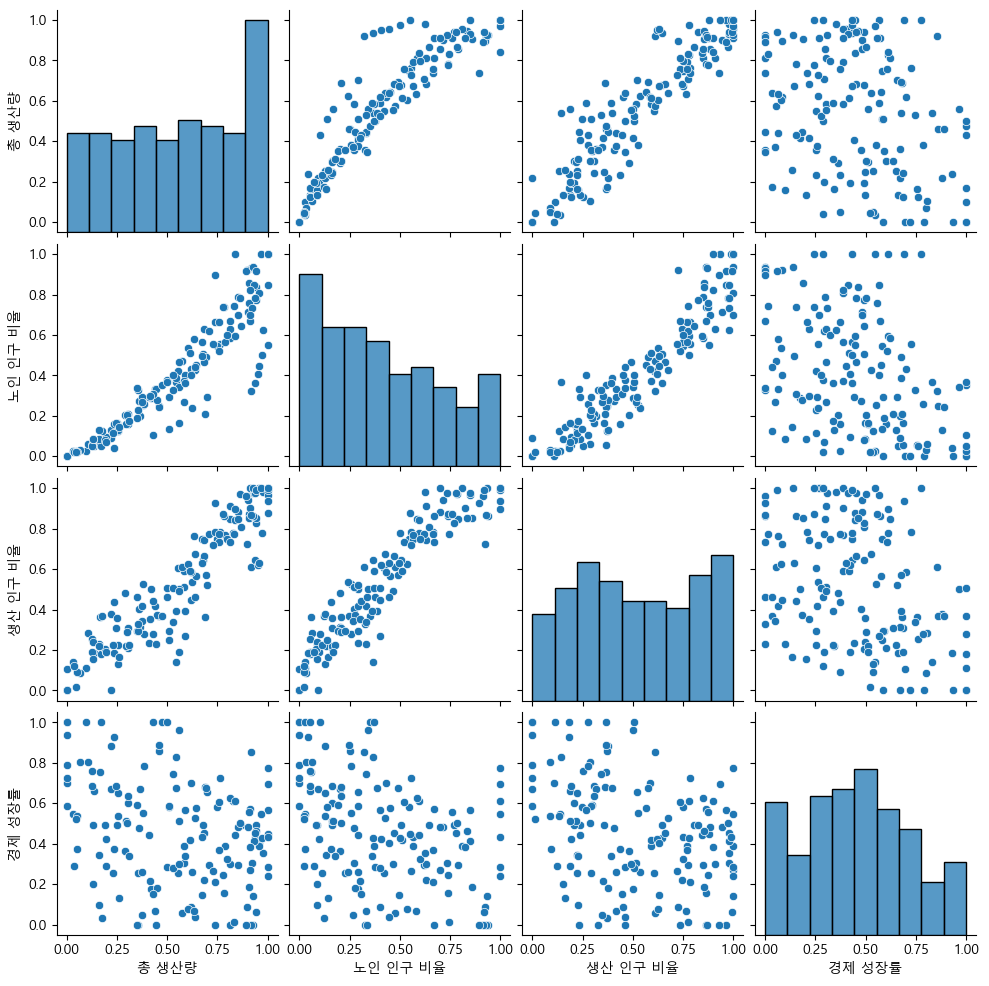

In [64]:
sns.pairplot(final)
plt.show()                  # 산점도 그래프를 이용하여 각 값의 상관관계를 도출

In [65]:
final.xs('서울특별시', level=1)

,총 생산량,노인 인구 비율,생산 인구 비율,경제 성장률
연도,,,,
2000,0.000000,0.000000,0.000000,1.000000
2001,0.050358,0.026316,0.092939,0.373626
2002,0.135778,0.052632,0.186714,0.659341
2003,0.159550,0.087719,0.229262,0.098901
2004,0.175530,0.122807,0.369465,0.032967
2005,0.233516,0.157895,0.435658,0.373626
2006,0.292706,0.201754,0.480065,0.362637
2007,0.379255,0.254386,0.525776,0.549451
2008,0.417658,0.289474,0.502700,0.175824


In [66]:
final.head(20)

총 생산량  노인 인구 비율  생산 인구 비율    경제 성장률
연도   시도                                           
2000 서울특별시  0.000000  0.000000  0.000000  1.000000
     부산광역시  0.000000  0.000000  0.105914  0.698113
     대구광역시  0.000000  0.000000  0.000000  0.935484
     인천광역시  0.000000  0.000000  0.000000  0.722628
     광주광역시  0.000000  0.000000  0.000000  0.790210
     대전광역시  0.000000  0.000000  0.000000  1.000000
     울산광역시  0.000000  0.000000  0.000000  0.587209
2001 서울특별시  0.050358  0.026316  0.092939  0.373626
     부산광역시  0.098318  0.027778  0.110895  1.000000
     대구광역시  0.033374  0.025862  0.139547  0.548387
     인천광역시  0.068897  0.031915  0.085782  0.802920
     광주광역시  0.050829  0.021739  0.088663  0.538462
     대전광역시  0.038717  0.020619  0.120891  0.289157
     울산광역시  0.045137  0.020833  0.014368  0.523256
2002 서울특별시  0.135778  0.052632  0.186714  0.659341
     부산광역시  0.164746  0.055556  0.364819  0.754717
     대구광역시  0.104389  0.060345  0.284647  0.806452
     인천광역시  0.169349  0.053191  0.180149  1.000000
     광주광역시  0.125278  0.054348  0.190648  0.685315
     대전광역시  0.125951  0.051546  0.253731  0.759036

In [67]:
df_seoul=final.xs('서울특별시', level=1)
df_seoul

,총 생산량,노인 인구 비율,생산 인구 비율,경제 성장률
연도,,,,
2000,0.000000,0.000000,0.000000,1.000000
2001,0.050358,0.026316,0.092939,0.373626
2002,0.135778,0.052632,0.186714,0.659341
2003,0.159550,0.087719,0.229262,0.098901
2004,0.175530,0.122807,0.369465,0.032967
2005,0.233516,0.157895,0.435658,0.373626
2006,0.292706,0.201754,0.480065,0.362637
2007,0.379255,0.254386,0.525776,0.549451
2008,0.417658,0.289474,0.502700,0.175824


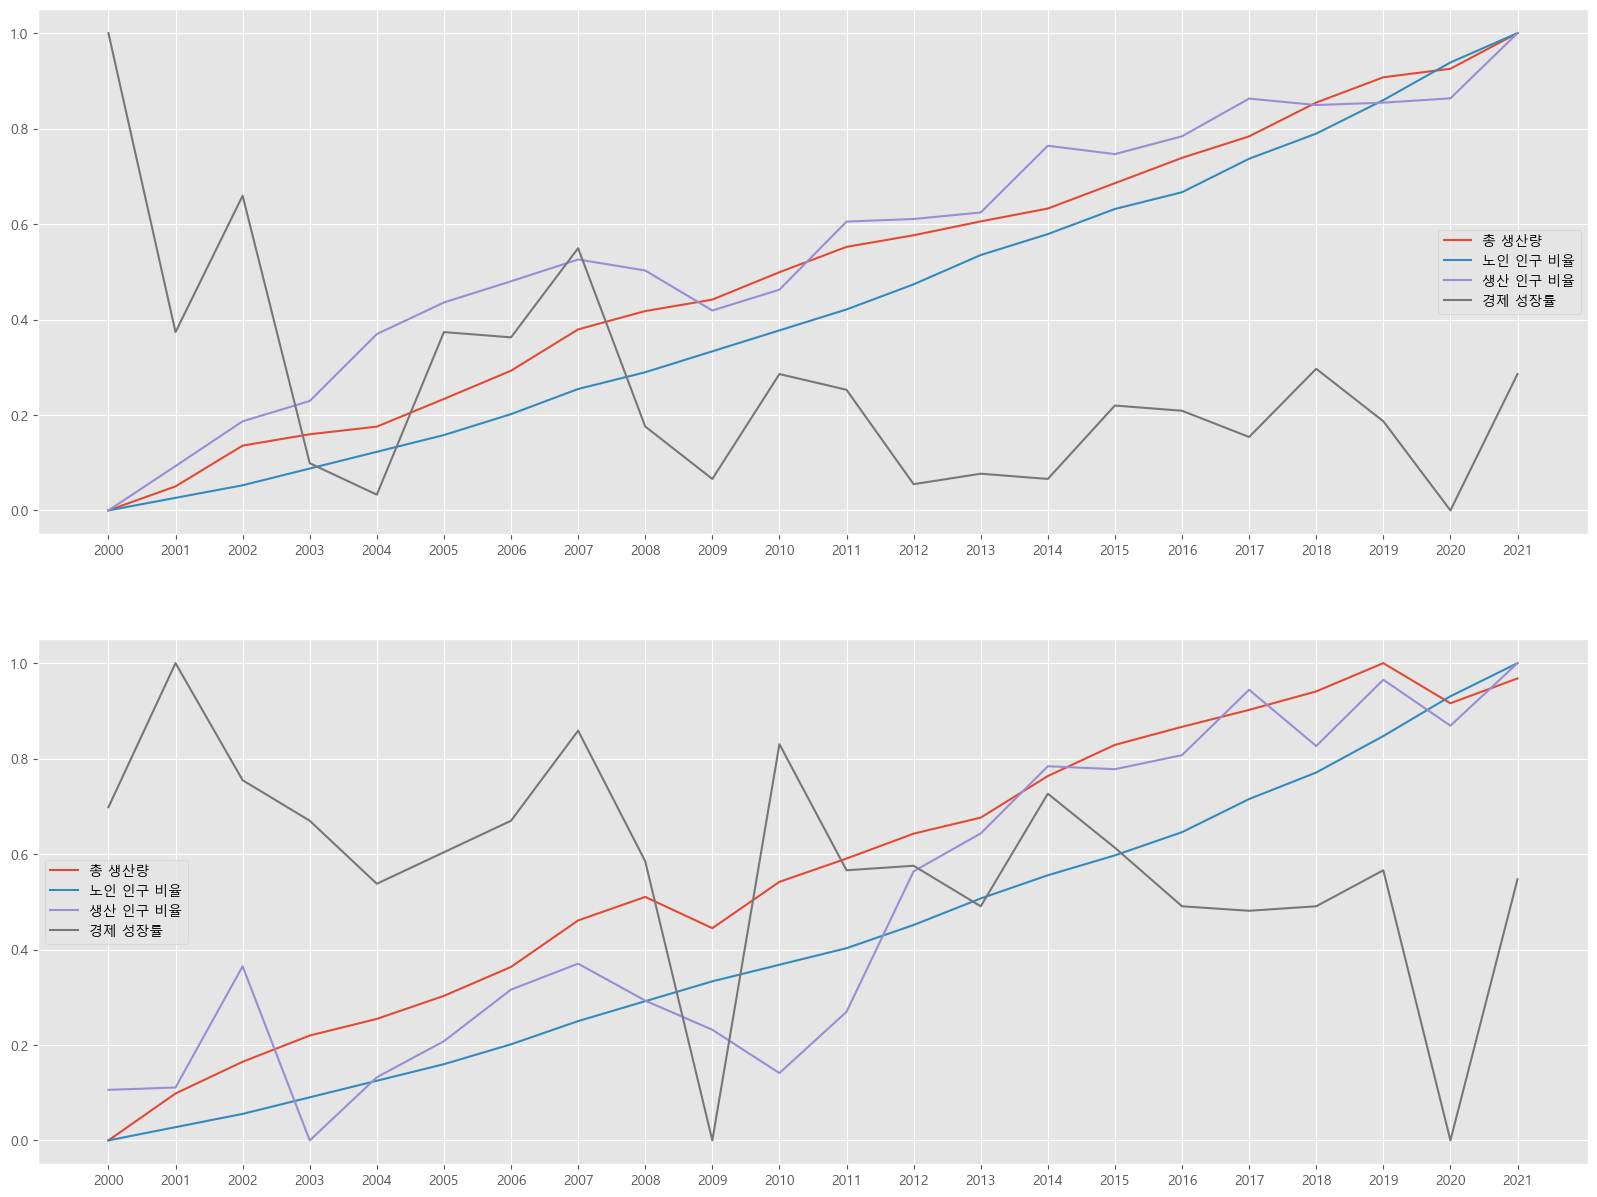

In [68]:
plt.style.use('ggplot')

fig=plt.figure(figsize=(20,15))

ax1=fig.add_subplot(2,1,1)
ax2=fig.add_subplot(2,1,2)

ax1.plot(final.xs('서울특별시', level=1).index,final.xs('서울특별시', level=1), label=final.columns )
ax1.legend()
ax2.plot(final.xs('부산광역시', level=1).index,final.xs('부산광역시', level=1),  label=final.columns)
ax2.legend()
plt.show()